## Walking through feature/emissions in lcdmpc

In [1]:
import lcdmpc as opt
import numpy as np
# import matplotlib
# matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt
import pandas as pd

from models.control.bldg_grid_agg_data_driven_bldg60 import bldg_grid_agg_data_driven_bldg60
#from models.control.bldg_grid_agg_data_driven_bldg62 import bldg_grid_agg_data_driven_bldg62
from models.control.bldg_grid_agg_data_driven_mdl_large import bldg_grid_agg_data_driven_mdl_large
from models.control.bldg_grid_agg_data_driven_mdl_med import bldg_grid_agg_data_driven_mdl_med
from models.control.bldg_grid_agg_data_driven_mdl_small import bldg_grid_agg_data_driven_mdl_small
from models.simulation.bldg_sim_mdl_bldg60 import bldg_sim_mdl_bldg60
#from models.simulation.bldg_sim_mdl_bldg62 import bldg_sim_mdl_bldg62
from models.simulation.bldg_sim_mdl_large import bldg_sim_mdl_large
from models.simulation.bldg_sim_mdl_med import bldg_sim_mdl_med
from models.simulation.bldg_sim_mdl_small import bldg_sim_mdl_small
from models.control.grid_aggregator import grid_aggregator


/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)
/Users/svijaysh/Emissions/models/control/bldg_grid_agg_data_driven_mdl_large.py:257: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if key is "Q_internal":
/Users/svijaysh/Emissions/models/control/bldg_grid_agg_data_driven_mdl_large.py:261: SyntaxWarning: "is" with a literal. Did you mean "=="?
  elif key is "Q_solar":


In [3]:
dt_num_offset = 30

start_time = 24*60 - dt_num_offset   # Start time in minutes; 700
dt = 1              # Time-step in minutes

tmp = opt.LCDMPC(start_time, dt)

time = 10*60 + dt_num_offset     # Length of simulation in minutes
horiz_len = 5   # Prediction horizion length
commuincation_iterations =  6# number of communications between subsystems
Beta = 0.4      # Convex combination parameter for control action

time_array = np.arange(start_time, (start_time + time), dt)

# bldg1_disturb_file = 'input/ROM_simulation_data_interp.csv'
bldg1_small_disturb_file = 'input/ROM_simulation_data_small_office.csv'
bldg1_disturb_file = 'input/ROM_simulation_data_large_office_denver.csv'

num_buildings_large = 1
num_buildings_medium = 0
num_buildings_small = 0
num_buildings_total = num_buildings_large + num_buildings_medium + num_buildings_small

ms_dot_large = 8.0
T_sa_large = 12.8
T_oa_large = 28.
T_z_large = 23.0 # 21.2
T_e_large = 20.

ms_dot_large2 = 6.0
T_sa_large2 = 12.8
T_oa_large2 = 28.
T_z_large2 = 23.0 # 22.0
T_e_large2 = 20.

ms_dot_large3 = 10.0
T_sa_large3 = 12.8
T_oa_large3 = 28.
T_z_large3 = 23.0 # 22.3
T_e_large3 = 20.


ms_dot_medium = 1.0
T_sa_medium = 12.8
T_oa_medium = 28.95
T_z_medium = 22.0
T_e_medium = 20.

ms_dot_small = 1.0
T_sa_small = 12.8
T_oa_small = 28.
T_z_small = 24.3313
T_e_small = 24.

Q_int = 8.0
Q_solar = 15.0

inputs = [ms_dot_large, T_sa_large, T_oa_large, T_z_large]
inputs_large = [ms_dot_large, T_sa_large, T_oa_large, T_z_large]
inputs_large2 = [ms_dot_large2, T_sa_large2, T_oa_large2, T_z_large2]
inputs_large3 = [ms_dot_large3, T_sa_large3, T_oa_large3, T_z_large3]
inputs_medium = [ms_dot_medium, T_sa_medium, T_oa_medium, T_z_medium]
inputs_small = [ms_dot_small, T_sa_small, T_oa_small, T_z_small]

inputs_large_all = [inputs_large, inputs_large2, inputs_large3]
ms_dot_large_all = [ms_dot_large, ms_dot_large2, ms_dot_large3]
T_sa_large_all = [T_sa_large, T_sa_large2, T_sa_large3]
T_z_large_all = [T_z_large, T_z_large2, T_z_large3]
T_e_large_all = [T_e_large, T_e_large2, T_e_large3]

disturb1 = [6.0, 2.0, 2.0]
disturb2 = [6.0, 2.0, 2.0]

outputs1 = [1]
outputs2 = [1]

# refs_large = [[0.0], [20.], [0.0]]
# refs_large = [[21.5 - 22.794], [20.], [0.0]]
# refs_large2 = [[21.5 - 22.794], [20.], [0.0]]
# refs_large3 = [[21.5 - 22.794], [20.], [0.0]]
refs_large = [[21.65 - 22.794], [20.], [0.0], [0.0]]
# 
# Temperature, Building power cons, error, emissions. 
refs_large2 = [[21.5 - 22.794], [20.], [0.0], [0.0]]
refs_large3 = [[21.5 - 22.794], [20.], [0.0], [0.0]]
# refs_60 = [[21.5 - 20.853], [20.], [0.0]]
# refs_62 = [[21.5 - 20.853], [20.], [0.0]]
# refs_large_all = [refs_60, refs_62]
refs_large_all = [refs_large, refs_large2, refs_large3]


refs_medium = [[21.5 - 23.8812], [20.], [0.0]]
refs_small = [[0], [20.], [0.0]]

disturbance_data = pd.read_csv(bldg1_disturb_file)
Toa_horiz = disturbance_data.iloc[start_time: start_time + int(time/dt) + horiz_len]['T_outside'].values
Toa_horiz_normed = Toa_horiz/Toa_horiz[0]

Visualize emissions data

Text(0, 0.5, 'Rate of Emissions (kg of CO2/ MWh)')

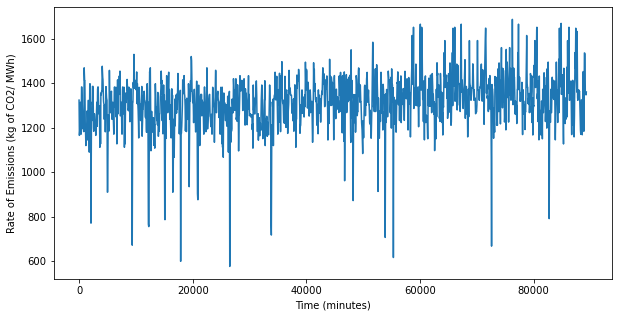

In [4]:
plt.figure(figsize=(10, 5))
disturbance_data["emmissions"].plot()
plt.xlabel("Time (minutes)")
plt.ylabel("Rate of Emissions (kg of CO2/ MWh)")

In [5]:
disturbance_data.describe()

,Unnamed: 0,T_outside,Q_internal,Q_hvac,Q_solar,T_room,P_floor,emmissions
count,89280.000000,89280.000000,89280.000000,89280.000000,89280.000000,89280.000000,89280.000000,89280.000000
mean,44639.500000,28.641270,13.782364,72.848175,10.754312,25.480396,20.806676,1315.255218
std,25773.060354,4.330225,7.656693,34.019478,11.133341,1.804792,6.905104,107.540899
min,0.000000,21.000000,7.177611,0.000000,0.000000,23.229857,14.088418,576.670405
25%,22319.750000,24.750000,8.250582,48.647551,0.000000,23.506168,16.186670,1259.998299
50%,44639.500000,27.838333,10.434353,65.509798,7.050908,25.354334,18.603436,1321.651213
75%,66959.250000,32.200000,20.774745,105.244039,22.516310,27.197824,29.413211,1378.715303
max,89279.000000,41.000000,27.894282,193.292370,32.596473,28.675693,32.115655,1686.462407


In [6]:
np.random.seed(1)
grid_agg_ref = np.random.normal(6*num_buildings_small + 20*num_buildings_medium + 10*num_buildings_large, 0.0, int(time/dt) + horiz_len)*Toa_horiz_normed
# grid_agg_ref = np.random.normal(6*num_buildings_small + 20*num_buildings_medium + 12*num_buildings_large, 2.0, int(10*60/dt) + horiz_len)#*Toa_horiz_normed


# This reference is for the grid aggregator, not the building
refs_grid_total = pd.DataFrame()
for i in range(int(time/dt) + horiz_len):
    refs_grid_total = refs_grid_total.append(
        {
            'time': start_time + i,
            'grid_ref': [[grid_agg_ref[i]]] + [[0.] for i in range(num_buildings_total)]
        },
        ignore_index=True
    )
bldg_optoptions_large = {
    # 'Major feasibility tolerance': 1e1,
    'Print file': 'SNOPT_bldg_lg_print.out',
    'Summary file': 'SNOPT_bldg_lg_summary.out',
    'Proximal iterations limit': 1000,
}
bldg_optoptions_med = {
    # 'Major feasibility tolerance': 1e1,
    'Print file': 'SNOPT_bldg_med_print.out',
    'Summary file': 'SNOPT_bldg_med_summary.out',
    'Proximal iterations limit': 1000,
}
bldg_optoptions_small = {
    # 'Major feasibility tolerance': 1e1,
    'Print file': 'SNOPT_bldg_small_print.out',
    'Summary file': 'SNOPT_bldg_small_summary.out',
    'Proximal iterations limit': 1000,
}
grid_optoptions = {
    # 'Major feasibility tolerance': 1e3,
    'Print file': 'SNOPT_grid_print.out',
    'Summary file': 'SNOPT_grid_summary.out',
    'Proximal iterations limit': 1000,
}

num_downstream1 = num_buildings_total
num_upstream1 = 0

building_control_models = []
building_truth_models = []

np.random.seed(1)
Qint_scale = np.random.normal(1.3, 0.2, num_buildings_total).tolist()
np.random.seed(1)
Qsol_scale = np.random.normal(1.5, 0.5, num_buildings_total).tolist()

Qint_scale = np.ones(np.shape(Qint_scale)).tolist()
Qsol_scale = np.ones(np.shape(Qsol_scale)).tolist()

Qint_offset = [0.0]*num_buildings_total
Qsol_offset = [0.0]*num_buildings_total

Qint_std = [1.0]*num_buildings_total
Qsol_std = [1.0]*num_buildings_total

energy_red_weight = [0.0]*num_buildings_total


/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_grid_total = refs_grid_total.append(
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2851098634.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  refs_g

Text(0.5, 0, 'Time')

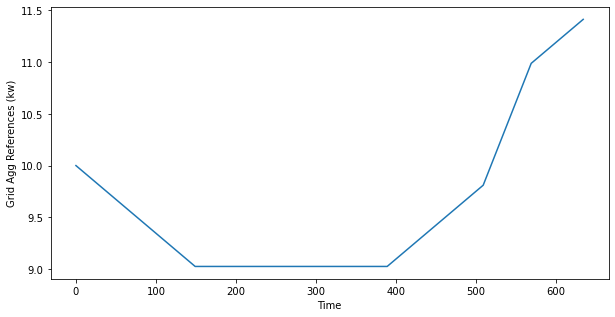

In [7]:
plt.figure(figsize=(10,5))
plt.plot(grid_agg_ref)
plt.ylabel("Grid Agg References (kw)")
plt.xlabel("Time")


In [8]:
for i in range(num_buildings_large):
    building_control_models.append(
        bldg_grid_agg_data_driven_mdl_large(
            ms_dot_large_all[i], T_sa_large_all[i], T_z_large_all[i], horiz_len, energy_red_weight[i],
            Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
            Qint_offset[i], Qsol_offset[i], emissions_factor = emissions_i
        )
    )
    building_truth_models.append(
        bldg_sim_mdl_large(dt/60, ms_dot_large_all[i], T_sa_large_all[i], T_z_large_all[i], T_e_large_all[i], start_time,
        Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
        Qint_offset[i], Qsol_offset[i])
    )

for i in range(num_buildings_medium):
    building_control_models.append(
        bldg_grid_agg_data_driven_mdl_med(
            ms_dot_medium, T_sa_medium, T_z_medium, horiz_len, energy_red_weight[i],
            Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
            Qint_offset[i], Qsol_offset[i]
        )
    )
    building_truth_models.append(
        bldg_sim_mdl_med(dt/60, ms_dot_medium, T_sa_medium, T_z_medium, T_e_medium, start_time,
        Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
        Qint_offset[i], Qsol_offset[i])
    )

for i in range(num_buildings_small):
    building_control_models.append(
        bldg_grid_agg_data_driven_mdl_small(
            ms_dot_small, T_sa_small, T_z_small, horiz_len, energy_red_weight[i],
            Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
            Qint_offset[i], Qsol_offset[i]
        )
    )
    building_truth_models.append(
        bldg_sim_mdl_small(dt/12, ms_dot_small, T_sa_small, T_z_small, T_e_small, start_time,
        Qint_std[i], Qsol_std[i], Qint_scale[i], Qsol_scale[i],
        Qint_offset[i], Qsol_offset[i])
    )

grid_agg1_cont = grid_aggregator(horiz_len, num_downstream1)
grid_agg1_truth = grid_aggregator(horiz_len, num_downstream1)

tmp.build_subsystem(0, grid_agg1_cont, grid_agg1_truth, 
    inputs, outputs1, horiz_len, Beta, bldg1_disturb_file, refs_total=refs_grid_total,
    optOptions=grid_optoptions)

for i in range(num_buildings_large):
    # print('i large: ', i + 1)
    tmp.build_subsystem(i + 1, building_control_models[i], building_truth_models[i],
    inputs_large_all[i], outputs1, horiz_len, Beta, bldg1_disturb_file, refs=refs_large_all[i],
    optOptions=bldg_optoptions_large)

for i in range(num_buildings_medium):
    # print('i medium: ', i + 1 + num_buildings_large)
    ind = i + 1 + num_buildings_large
    tmp.build_subsystem(ind, building_control_models[ind-1], building_truth_models[ind-1],
    inputs_medium, outputs1, horiz_len, Beta, bldg1_disturb_file, refs=refs_medium,
    optOptions=bldg_optoptions_med)

for i in range(num_buildings_small):
    # print('i small: ', i + 1 + num_buildings_large + num_buildings_medium)
    ind = i + 1 + num_buildings_large + num_buildings_medium
    tmp.build_subsystem(ind, building_control_models[ind-1], building_truth_models[ind-1],
    inputs_small, outputs1, horiz_len, Beta, bldg1_small_disturb_file, refs=refs_small,
    optOptions=bldg_optoptions_small)

connections = [[0, i+1] for i in range(num_buildings_total)] + \
              [[i+1, 0] for i in range(num_buildings_total)]

# connections = None
tmp.build_interconnections(interconnections=connections)


/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)
/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/autograd/numpy/numpy_wrapper.py:77: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return _np.array(args, *array_args, **array_kwargs)


In [9]:

outputs_all = []
disturbance_all = []
controls_all = []
gamma_all = []

# tmp.calc_stability()
# lkj

for i in range(int(time/dt)):

    print('+++++++++++++++++++++++++++++')
    print('time iteration: ', i)
    print('+++++++++++++++++++++++++++++')

    # TODO: Need to map states to updated state (LPV like)

    tmp.relinearize_subsystem_models()

    gamma_comm = []
    for j in range(commuincation_iterations):
        # Communication step
        tmp.communicate()
        # Optimize all subsystems (individual objective functions)
        tmp.optimize_all()
        # Convex summation of control parameters (for stability)
        tmp.convex_sum_cont()
        # Update Z's for downstream subsystems
        tmp.update_downstream_outputs()

        gamma_comm.append(tmp.calculate_sensitivities())

        # print('==============================')
        print('communication iteration: ', j)
        # print('==============================')
    # Update state equations for subsystems
    tmp.update_states()
    # Update outputs of subsystems
    tmp.update_subsystem_outputs()

    # Gather outputs for plotting purposes
    outputs = tmp.simulate_truth_model()
    outputs_all.append(outputs)

    # Update control model's filter
    tmp.update_control_filter()
    # Update values for linearization
    tmp.update_inputs_for_linearization()
    # Get updated forecast inputs
    tmp.update_forecast_inputs()
    # Gather control actions for plotting purposes
    disturbance_all.append([[subsys.d] for subsys in tmp.subsystems])
    controls_all.append([[subsys.uConv] for subsys in tmp.subsystems])
    gamma_all.append(gamma_comm)


+++++++++++++++++++++++++++++
time iteration:  0
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  1
+++++++++++++++++++++++++++++


/opt/anaconda3/envs/aumc1/lib/python3.9/site-packages/pyoptsparse/pyOpt_optimization.py:234: UserWarning: The argument `type=` is deprecated. Use `varType` in the future.
  warnings.warn("The argument `type=` is deprecated. Use `varType` in the future.")


communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  2
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  3
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  4
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  5
+++++++++++++++++++++++++++++
communicatio

communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  35
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  36
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  37
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  38
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communic

communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  69
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  70
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  71
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  72
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communic

communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  103
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  104
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  105
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  106
+++++++++++++++++++++++++++++
communication iteration:  0
comm

communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  137
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  138
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  139
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  140
+++++++++++++++++++++++++++++
communication iteration:  0
comm

communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  170
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  171
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  172
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  173
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
comm

communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  204
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  205
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  206
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  207
+++++++++++++++++++++++++++++
communication iteration:  0
comm

communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  237
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  238
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  239
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  240
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
comm

communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  271
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  272
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  273
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  274
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
comm

communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  304
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  305
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  306
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  307
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
comm

communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  337
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  338
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  339
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  340
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
comm

communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  370
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  371
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  372
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  373
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
comm

communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  404
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  405
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  406
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  407
+++++++++++++++++++++++++++++
communication iteration:  0
comm

communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  437
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  438
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  439
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  440
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
comm

communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  471
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  472
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  473
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  474
+++++++++++++++++++++++++++++
comm

communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  504
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  505
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  506
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  507
+++++++++++++++++++++++++++++
communication iteration:  0
comm

communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  537
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  538
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  539
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  540
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
comm

communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  570
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  571
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  572
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  573
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
comm

communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  604
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  605
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  606
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
communication iteration:  3
communication iteration:  4
communication iteration:  5
+++++++++++++++++++++++++++++
time iteration:  607
+++++++++++++++++++++++++++++
communication iteration:  0
communication iteration:  1
communication iteration:  2
comm

/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2371751303.py:76: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2371751303.py:92: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2371751303.py:121: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
/var/folders/sk/6d3t1k8163q5l95c5tcr2t9x68smg8/T/ipykernel_27661/2371751303.py:172: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
/var/folders/s

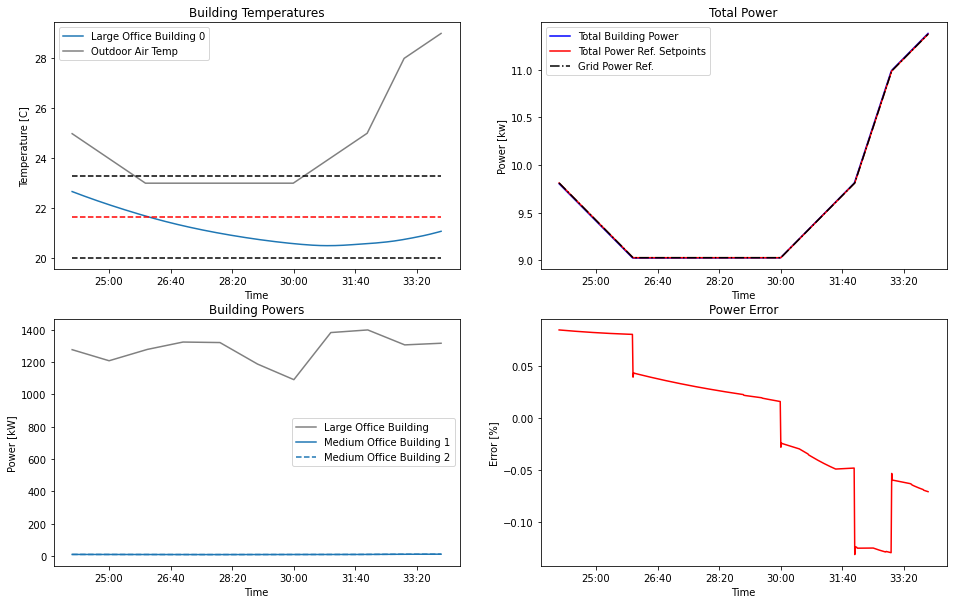

In [10]:
import pickle

pickle.dump([tmp, outputs_all, disturbance_all, controls_all, gamma_all], open('results.p', 'wb'))

# tmp, outputs_all, controls_all, gamma_all = pickle.load(
#     open('results/1lrg2med/8hrs_30minwrmup_5horiz_0.4beta_TempRefTrackAll/results.p', 'rb')
# )


# Temperature inner
plot_temps = []
for i in range(num_buildings_total):
    plot_temps.append([val[i+1:][0][0][0][0] for val in outputs_all])

# Building powers
plot_bldg_powers = []
for i in range(num_buildings_total):
    plot_bldg_powers.append([val[i+1:][0][1][0][0] for val in outputs_all])

# print(outputs_all)
# print('-------------')
# print(outputs_all[0][0])
# print(outputs_all[0][0][0])

# GA output 
grid_prefs_ind = []
for i in range(num_buildings_total):
    grid_prefs_ind.append([val[0][i][0] for val in outputs_all])


total_power = []
grid_prefs_total = []

for i in range(len(outputs_all)):
    sum_of_powers = np.sum([val[1] for val in outputs_all[i][1:]])
    sum_of_grid_prefs = np.sum(outputs_all[i][0][:])
    total_power.append(sum_of_powers)
    grid_prefs_total.append(sum_of_grid_prefs)

T_lower = 20.0
T_upper = 23.3
P_lower = 0.0
P_upper = 100.0

fig, axes = plt.subplots(2, 2, figsize=(16,10))

disturbance_data = pd.read_csv(bldg1_disturb_file)


# Temperatures inside building
ax2 = axes[0, 0]
bldg_temp_legend = ['Large Office Building 0']
for i in range(num_buildings_total):
    ax2.plot(
        time_array[dt_num_offset:], np.array(plot_temps[i]).flatten()[dt_num_offset:]
    )
# Outside temoperature 
ax2.plot(
    time_array[dt_num_offset:],
    disturbance_data.iloc[
        start_time + dt_num_offset: start_time + int(time/dt)
    ]['T_outside'].values, color='gray'
)

# Lower bound on temperature
ax2.plot(
    time_array[dt_num_offset:], T_lower*np.ones(len(time_array))[dt_num_offset:], '--k'
)
# Upper bound on temperature
ax2.plot(
    time_array[dt_num_offset:], T_upper*np.ones(len(time_array))[dt_num_offset:], '--k'
)
ax2.plot(time_array[dt_num_offset:], (np.array(refs_large[0]) + 22.794)*np.ones(len(time_array))[dt_num_offset:], '--r')
ax2.legend(bldg_temp_legend + ['Outdoor Air Temp'])
xticks = ax2.get_xticks()
ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
ax2.set_title('Building Temperatures')
ax2.set_ylabel('Temperature [C]')
ax2.set_xlabel('Time')

ax2 = axes[1, 0]
bldg_temp_legend = ['Emissions Data']

ax2.plot(
    time_array[dt_num_offset:],
    disturbance_data.iloc[
        start_time + dt_num_offset: start_time + int(time/dt)
    ]['emmissions'].values, color='gray'
)

xticks = ax2.get_xticks()
ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
ax2.set_title('Emissions Rate of Electricity Used')
ax2.set_ylabel('CO2 Emissions [kg/MWh]')
ax2.set_xlabel('Time')

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax2 = axes[1, 0]
bldg_power_legend = ['Large Office Building', 'Medium Office Building 1', 'Medium Office Building 2']
for i in range(num_buildings_total):
    ax2.plot(
        time_array[dt_num_offset:],
        np.array(plot_bldg_powers[i]).flatten()[dt_num_offset:],
        color=colors[i]
    )
    # bldg_power_legend.append('Large Office Building ' + str(i))
for i in range(num_buildings_total):
    ax2.plot(
        time_array[dt_num_offset:],
        np.array(grid_prefs_ind[i]).flatten()[dt_num_offset:],
        '--',
        color=colors[i]
    )
    bldg_power_legend.append(r'$P_{ref}$ Building ' + str(i))
# ax2.plot(time_array[dt_num_offset:], pref1[dt_num_offset:], '--', color='tab:blue')
# bldg_power_legend.append('pref1')
# ax2.plot(time_array[dt_num_offset:], pref2[dt_num_offset:], '--', color='tab:orange')
# bldg_power_legend.append('pref2')
ax2.legend(bldg_power_legend)
xticks = ax2.get_xticks()
ax2.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
ax2.set_title('Building Powers')
ax2.set_ylabel('Power [kW]')
ax2.set_xlabel('Time')

emissions_used = np.multiply(
    disturbance_data.iloc[start_time + dt_num_offset: start_time + int(time/dt)]['emmissions'].values,
    np.array(total_power).flatten()[dt_num_offset:]/1e3,
)

#from numpy import trapz

# total_emissions = trapz(emissions_used/60, dx=1)
# total_power_ = trapz(np.array(total_power).flatten()[dt_num_offset:], dx=1)
# print('total emissions: ', total_emissions)
# print('total power: ', total_power_)

# ax4 = axes[0, 1]
# ax4.plot(
#     time_array[dt_num_offset:],
#     emissions_used,
#     '-b'
# )
# ax4.plot(
#     time_array[dt_num_offset:],
#     np.array(grid_prefs_total).flatten()[dt_num_offset:],
#     '-r'
# )
# ax4.plot(time_array[dt_num_offset:], grid_agg_ref[dt_num_offset-1:time-1], '-.k')
# ax4.legend(['CO2 Emissions'])
# xticks = ax4.get_xticks()
# ax4.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
# ax4.set_title('Instantaneous CO2 Emissions')
# ax4.set_ylabel('CO2 Emissions')
# ax4.set_xlabel('Time')

ax4 = axes[0, 1]
# This is bombing
ax4.plot(
    time_array[dt_num_offset:],
    np.array(total_power).flatten()[dt_num_offset:],
    '-b'
)
ax4.plot(
    time_array[dt_num_offset:],
    np.array(grid_prefs_total).flatten()[dt_num_offset:],
    '-r'
)
ax4.plot(time_array[dt_num_offset:], grid_agg_ref[dt_num_offset-1:time-1], '-.k')
ax4.legend(['Total Building Power', 'Total Power Ref. Setpoints', 'Grid Power Ref.'])
xticks = ax4.get_xticks()
ax4.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
ax4.set_title('Total Power')
ax4.set_ylabel('Power [kw]')
ax4.set_xlabel('Time')

ax4 = axes[1, 1]
# print(np.shape(grid_agg_ref))
# print(np.shape(total_power))
# print(grid_agg_ref)
# print(total_power)
ax4.plot(
    time_array[dt_num_offset:],
    np.array(
        (
            np.array(grid_agg_ref[dt_num_offset-1:time-1]) - np.array(total_power).flatten()[dt_num_offset:]
        ) / np.array(grid_agg_ref[dt_num_offset-1:time-1])*100
    ),
    '-r'
)
xticks = ax4.get_xticks()
ax4.set_xticklabels(['{:02.0f}:{:02.0f}'.format(*divmod(val, 60)) for val in xticks])
ax4.set_title('Power Error')
ax4.set_ylabel('Error [%]')
ax4.set_xlabel('Time')

plt.savefig('results.pdf', bbox_inches='tight')

plt.show()




In [12]:
plt

array([12.13557183, 12.11919118, 12.10095507, 12.08208307, 12.06319333,
       12.04431926, 12.02545978, 12.00661468, 11.98778393, 11.96896768,
       11.9501659 , 11.93137835, 11.91252921, 11.89382176, 11.87476468,
       11.85597111, 11.8347843 , 11.81746296, 11.79869126, 11.77986686,
       11.76224001, 11.74324019, 11.72467093, 11.70670272, 11.68829903,
       11.66967585, 11.65113205, 11.632377  , 11.61391583, 11.59468174,
       11.57579737, 11.55830903, 11.53972025, 11.52109974, 11.5030361 ,
       11.48463512, 11.46635284, 11.44794971, 11.42954904, 11.41117465,
       11.39280077, 11.37444635, 11.35610624, 11.33778182, 11.31947188,
       11.30117392, 11.28287374, 11.26461101, 11.24592478, 11.22759356,
       11.208995  , 11.19145754, 11.17339684, 11.15520024, 11.13615104,
       11.11799577, 11.1007313 , 11.08264329, 11.06452449, 11.03732709,
       11.02682194, 11.02840591, 11.01633515, 10.98020544, 11.02348482,
       11.01974932, 10.97452068, 11.03037433, 11.02826976, 10.98